# MACHINE LEARNING CAPSTONE PROJECT

## 1. EDA

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import seaborn as sns

In [68]:
# read the file 
df= pd.read_csv('train.csv')


In [69]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
df.head()

Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1. 1 Check for missing value

In [3]:
missing_values_check= df.isnull().sum()
print("Missing values count:","\n", missing_values_check)

Missing values count: 
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.2 Calculating number of comments under each label

In [70]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums=df.iloc[:,2:].sum(axis=1)
clean_comments_count=(rowSums==0).sum(axis=0)
print("Total number of comments = ",len(df))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(df)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [71]:
categories = list(df.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [6]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


From the table above, we know that the datasets are unbalanced. \
The majority is clean comments:143346, only 15294 comments are toxic

### 1.3 Data Visulization

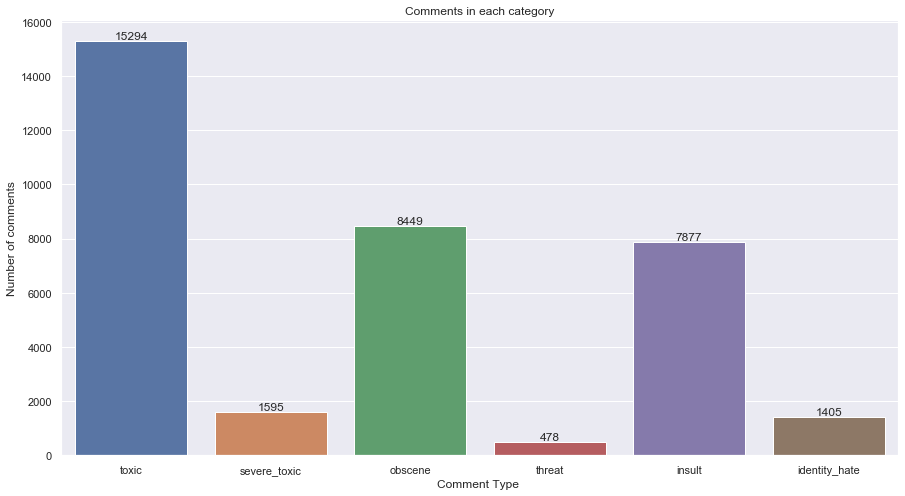

In [126]:
sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

ax=sns.barplot(categories, df.iloc[:,2:].sum().values)
plt.title("Comments in each category")
plt.ylabel('Number of comments')
plt.xlabel('Comment Type ')

#adding the text labels
rects = ax.patches
labels = df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2 , height,label, ha='center', va='bottom')

plt.show()

#### 1.3.1 Calculating number of comments having multiple labels

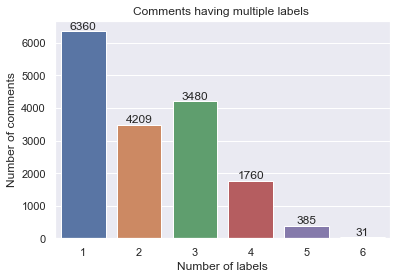

In [131]:
rowSums = df.iloc[:,2:].sum(axis=1) # calculate how many categories for each comment
multiLabel_counts = rowSums.value_counts() # amount of each label
multiLabel_counts = multiLabel_counts.iloc[1:] #  delete the clean comments


ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments')
plt.xlabel('Number of labels')

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()


From the plot above, most of comments have one lable

#### 1.3.2. WordCloud representation of most used words in each category of comments

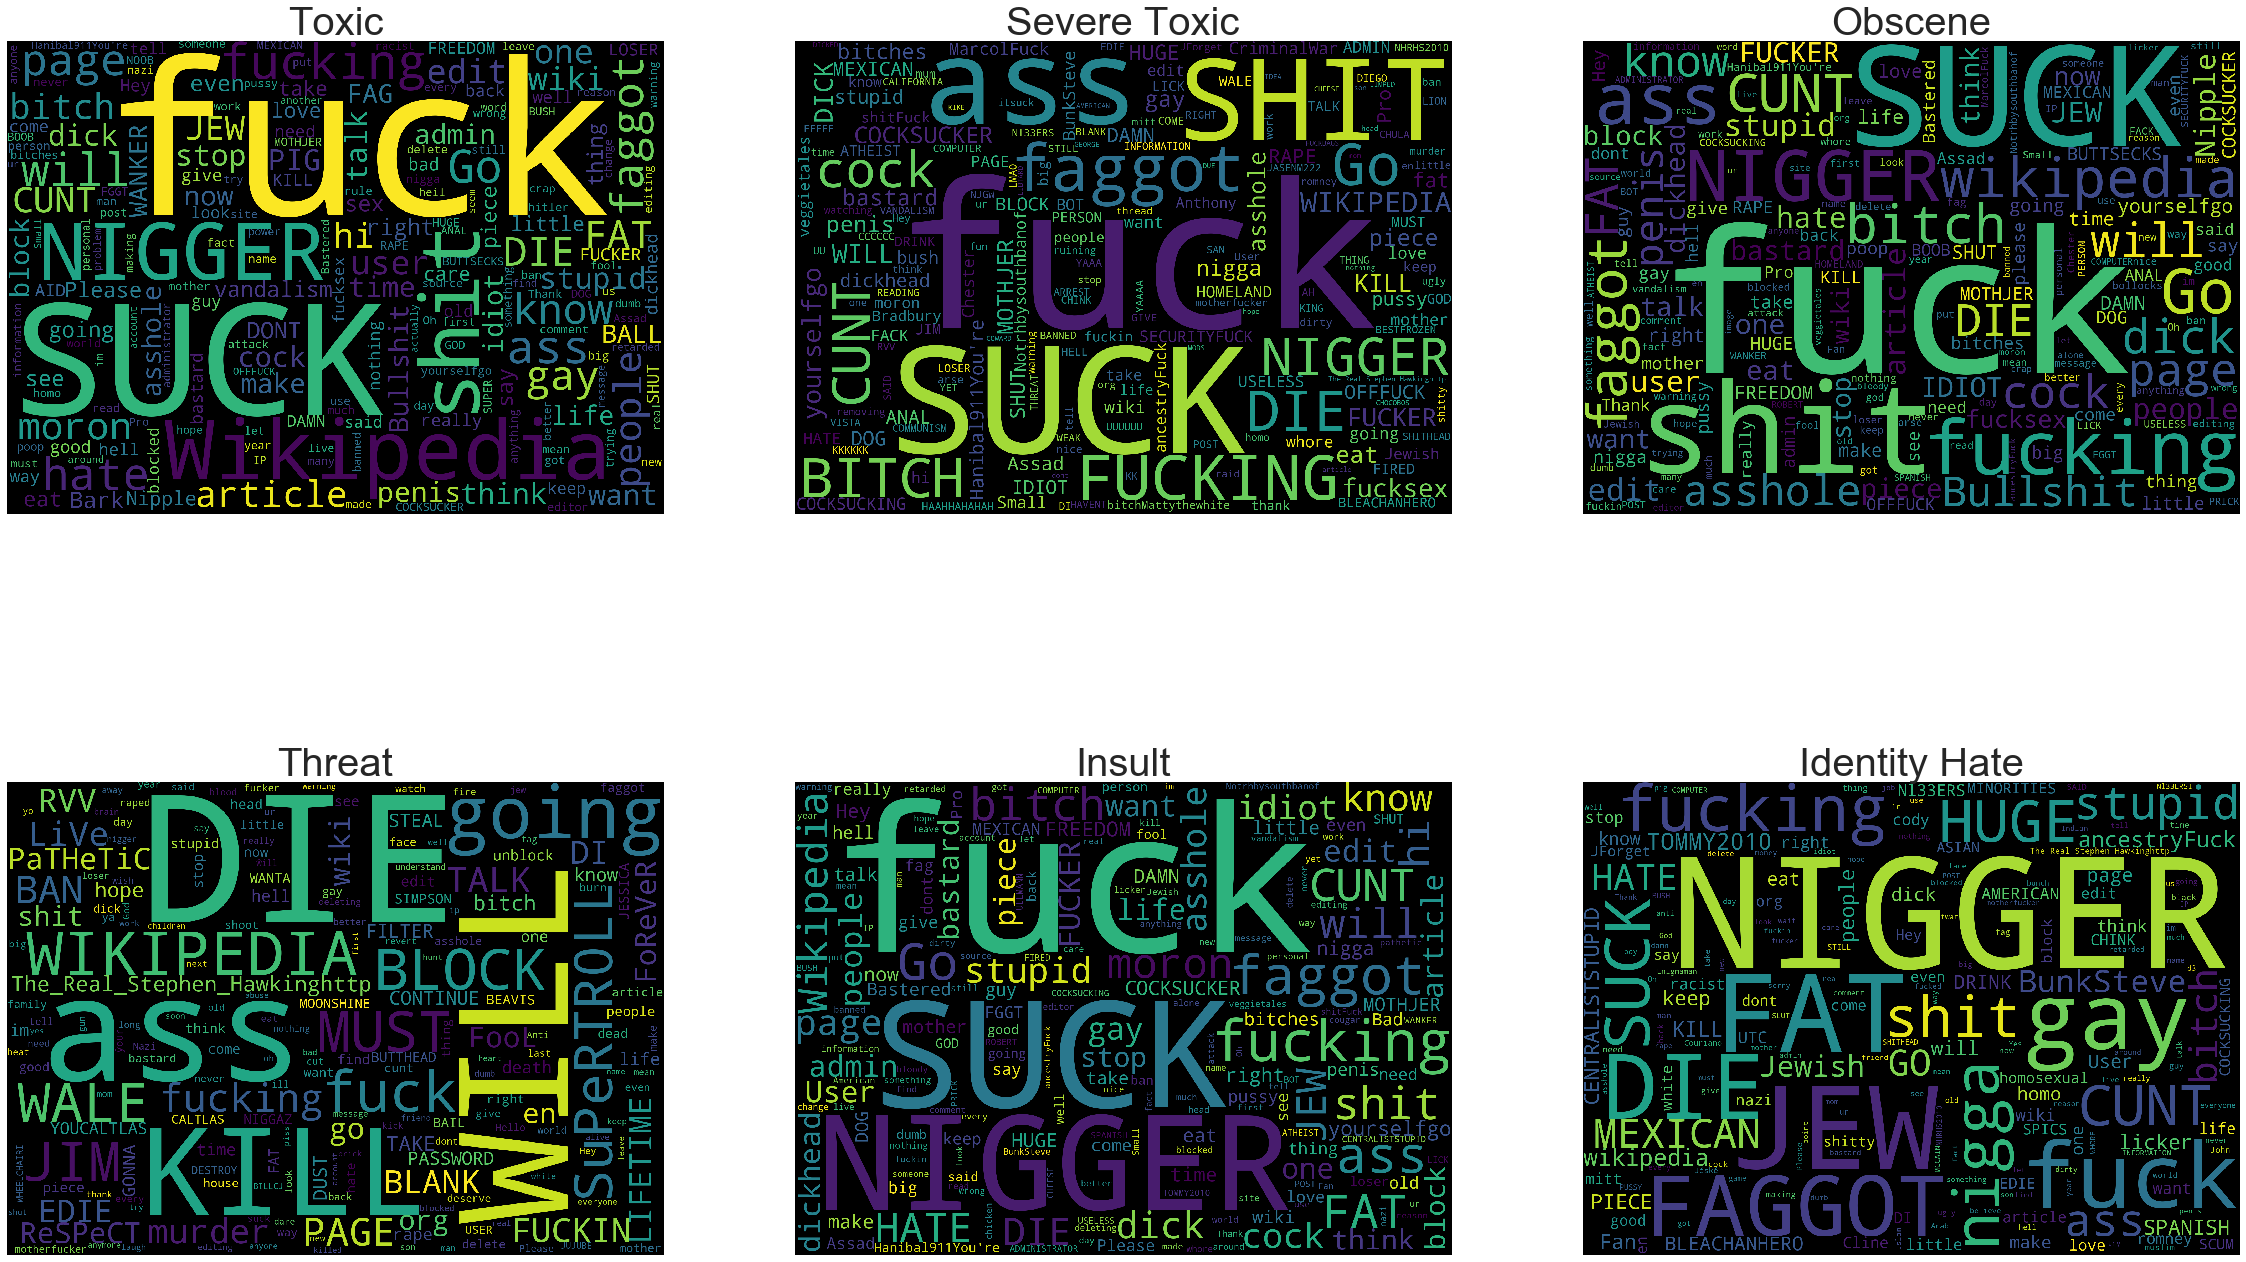

In [67]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = df[df.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = df[df.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

# obscene
subset = df[df.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = df[df.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)

# insult
subset = df[df.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = df[df.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

#### 1.3.3 Let us analyse the no. of comments having lengths varying from 0 to 1200

In [71]:
comment= df.iloc[:,1]
comment=comment.as_matrix()

/Users/effyhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


average length of comment: 394.073


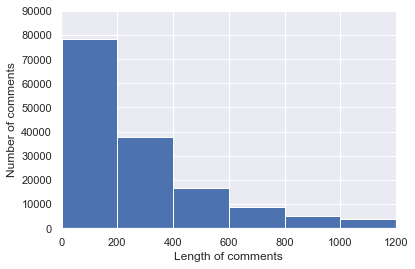

In [127]:

x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

#### 1.3.4.Number of comments classified as toxic,severe_toxic,....etc depending on their lengths

In [137]:
label = df[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())
label = label.as_matrix()

   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


/Users/effyhou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

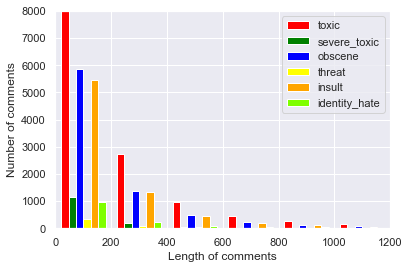

In [138]:
y = np.zeros(label.shape)  #(159571, 6)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

From the table above, we most comments'length is between 0 - 200

#### 1.3.5 Remove excessive length comments

Some very large length comments can be seen, in our dataset. These pose serious problems like adding excessively more words to the training dataset, causing training time to increase and accuracy to decrease!
Hence, a threshold of <b>400</b> characters will be created and only comments which have length smaller than 400 will be used further.

In [144]:
comments = []
labels = []

for ix in range(comment.shape[0]):
    if len(comment[ix])<=400:
        comments.append(comment[ix])
        labels.append(label[ix])

In [146]:
labels = np.asarray(labels)

In [147]:
print(len(comments))

115910


Hence, after removing comments longer than 400 characters, we are still left with more than 115910 comments, which seems enough for training purposes.

## 2. Data Pre-Processing

In [72]:
import nltk
from nltk.corpus import stopwords
from nltk.stem  import PorterStemmer,WordNetLemmatizer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [73]:
#create objects for stemmer and lemmatizer
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()
#download words from wordnet library
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/effyhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
# Choose 2000 subsample
data = df
data = df.loc[np.random.choice(df.index, size=2000)]
data.shape

(2000, 8)

### 2.1 Cleaning data

In [75]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')  # delete all contents in < >
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip() #strip blank space ''
    cleaned = cleaned.replace("\n"," ")
    return cleaned



def keepAlpha(sentence): 
    alpha_word = re.sub('[^a-z A-Z]+', ' ', sentence)   
    alpha_sent = alpha_word.strip()
    return alpha_sent 

In [76]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha) # series cannot be split, use .apply()
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2365,065af121c03dda26,sorry i left out the heading it may be cleare...,0,0,0,0,0,0
48648,82145d687ddbd269,future perfect thanks for warning the ip edit...,0,0,0,0,0,0
11994,1fc189821a287b26,regarding text formatting im talking about th...,0,0,0,0,0,0
133224,c8cb6a3046fb3d30,not the flag of the revolt which had inverted ...,0,0,0,0,0,0
66969,b323396d843deeef,frodo i cant believe you gave me my own page ...,1,0,0,0,0,0


In [77]:
data['comment_text'] 

2365      sorry i left out the heading  it may be cleare...
48648     future perfect  thanks for warning the ip edit...
11994     regarding text formatting  im talking about th...
133224    not the flag of the revolt which had inverted ...
66969     frodo  i cant believe you gave me my own page ...
                                ...                        
156382    preceding unsigned comment added by   talk   c...
140749    idiot   definition   yamla   yamla has to be o...
127100    link added to actors profile   i am the actres...
62592     the article as with some  people take too far ...
87670     wikinews australia day   i notice you havent b...
Name: comment_text, Length: 2000, dtype: object

### 2.2. Updating the list of stop words
Stop words are those words that are frequently used in both written and verbal communication and thereby do not have either a positive/negative impact on our statement.E.g. is, this, us,etc.
Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

In [78]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords.append('')

for x in range(ord('b'), ord('z')+1):
    stopwords.append(chr(x))

In [79]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 2.3 Stemming and Lemmatizing 

 
<b>Stemming</b> is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.\
<b>Lemmatizing</b> is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.
The wordnet library in nltk will be used for this purpose. Stemmer and Lemmatizer are also imported from nltk.

In [80]:
# stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2365,065af121c03dda26,sorri i left out the head it may be clearer no...,0,0,0,0,0,0
48648,82145d687ddbd269,futur perfect thank for warn the ip editor how...,0,0,0,0,0,0
11994,1fc189821a287b26,regard text format im talk about this version ...,0,0,0,0,0,0
133224,c8cb6a3046fb3d30,not the flag of the revolt which had invert gr...,0,0,0,0,0,0
66969,b323396d843deeef,frodo i cant believ you gave me my own page i ...,1,0,0,0,0,0


In [81]:
## lemming
Lemmer = WordNetLemmatizer()
def lemming(sentence):
    lemSentence = ""
    for word in sentence.split():
        lem = Lemmer.lemmatize(word)
        lemSentence += lem
        lemSentence += " "
    lemSentence = lemSentence.strip()
    return lemSentence

data['comment_text'] = data['comment_text'].apply(lemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2365,065af121c03dda26,sorri i left out the head it may be clearer no...,0,0,0,0,0,0
48648,82145d687ddbd269,futur perfect thank for warn the ip editor how...,0,0,0,0,0,0
11994,1fc189821a287b26,regard text format im talk about this version ...,0,0,0,0,0,0
133224,c8cb6a3046fb3d30,not the flag of the revolt which had invert gr...,0,0,0,0,0,0
66969,b323396d843deeef,frodo i cant believ you gave me my own page i ...,1,0,0,0,0,0


### 2.4. Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [83]:
train_text = train['comment_text']
test_text = test['comment_text']

### 2.5 Applying TF-IDF
Here we can finally convert our comments into a matrix of token counts, which signifies the number of times it occurs

In [84]:
#import required library

from sklearn.feature_extraction.text import TfidfVectorizer
#create object supplying our custom stop words
vectorizer = TfidfVectorizer(stop_words=stopwords)
#fitting it to converts comments into bag of words format
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [85]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

## 3. Multi-Label Classification

### - Let us define all the evaluation metrics

In [86]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))

### - Method
These include the <b>Binary Relevance, Label Powerset, Classifier Chain methods</b>.\
Implementations of these methods is available in the scikit-multilearn library

### Binary Relevance
### 3.1. Binary Relevance (BR) Method with MultinomialNB classifiers (from scratch)

In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output. This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels.

In [326]:
conda install skmultilearn.problem_transformation

Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - skmultilearn.problem_transformation

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [328]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 1.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB  # fit for text features

# initialize binary relevance multi-label classifier
# with a Multinomial naive bayes base classifier
classifier = BinaryRelevance(MultinomialNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.8833333333333333


CPU times: user 488 ms, sys: 148 ms, total: 635 ms
Wall time: 503 ms


In [332]:
# calculate results
evaluate_score(y_test,predictions)

Hamming_loss : 4.472222222222221
Accuracy : 86.83333333333333
Log_loss : 0.7536805986235501


### 3.2 BR Method with SVM classifier (from scikit-multilearn)

In [119]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
classifier.fit(x_train, y_train)

BinaryRelevance(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
        require_dense=[False, True])

In [120]:
#predictions
predictions = classifier.predict(x_test)

In [121]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.833333333333333
Accuracy : 89.16666666666667
Log_loss : 0.4121046779224527


### 3.3 BR Method with Logistic regression classifier (from scratch)

In [56]:
#create and fit classifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
classifier = BinaryRelevance(classifier = LogisticRegression(), require_dense = [False, True])
classifier.fit(x_train, y_train)

BinaryRelevance(classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        require_dense=[False, True])

In [57]:
#predictions
predictions = classifier.predict(x_test)

In [58]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.805555555555556
Accuracy : 88.33333333333333
Log_loss : 0.7365885813972324


### Classifier chain
### 3.4 Classifier chain with MultinomialNB classifier (from scikit-multilearn)

In [90]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB())
classifier.fit(x_train, y_train)

ClassifierChain(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        order=None, require_dense=[True, True])

In [91]:
#predictions
predictions = classifier.predict(x_test)

In [92]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.7777777777777777
Accuracy : 89.16666666666667
Log_loss : 0.6244455925295768


### 3.5 Classifier chain with SVM classifier (from scikit-multilearn

In [96]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(classifier = SVC(), require_dense = [False, True])
classifier.fit(x_train, y_train)

ClassifierChain(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
        order=None, require_dense=[False, True])

In [97]:
#predictions
predictions = classifier.predict(x_test)

In [98]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.833333333333333
Accuracy : 89.16666666666667
Log_loss : 0.4121046779224527


### 3.6 Classifier chain with Logistic Regression classifier  

In [116]:
#create and fit classifier
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(classifier = LogisticRegression(), require_dense = [False, True])
classifier.fit(x_train, y_train)

ClassifierChain(classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
        order=None, require_dense=[False, True])

In [117]:
#predictions
predictions = classifier.predict(x_test)

In [118]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.5000000000000004
Accuracy : 89.5
Log_loss : 0.5110604983590895


### Label Power Set Method

### 3.7 Label Powerset with MultinomialNB classifier (from scikit-multilearn)

In [103]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB())
classifier.fit(x_train, y_train)

LabelPowerset(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       require_dense=[True, True])

In [104]:
#predictions
predictions = classifier.predict(x_test)

In [105]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.833333333333333
Accuracy : 89.16666666666667
Log_loss : 0.4121046779224527


### 3.8 Label Powerset with SVM classifier (from scikit-multilearn)

In [109]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(classifier = SVC(), require_dense = [False, True])
classifier.fit(x_train, y_train)

LabelPowerset(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       require_dense=[False, True])

In [110]:
#predictions
predictions = classifier.predict(x_test)

In [111]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.833333333333333
Accuracy : 89.16666666666667
Log_loss : 0.4121046779224527


### 3.9 Label Powerset with Logistic Regression classifier (from scikit-multilearn)

In [122]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(LogisticRegression(), require_dense = [False, True])
classifier.fit(x_train, y_train)

LabelPowerset(classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       require_dense=[False, True])

In [123]:
#predictions
predictions = classifier.predict(x_test)

In [124]:
#calculate scores
evaluate_score(y_test,predictions)

Hamming_loss : 3.75
Accuracy : 89.33333333333333
Log_loss : 0.40863894201965295
